Consider the 2D Poisson’s equation in the domain Ω = [0, 1] × [0, 1], the unit square:

###$$\frac{\partial^2 u}{\partial x^2} - \frac{\partial^2 u}{\partial y^2} = f \hspace{0.2 cm} in \hspace{0.2 cm} \Omega$$

with the boundary condition
$$ u=g \hspace{0.2 cm} on  \hspace{0.2 cm} \partial{\Omega}$$
where f and g are given functions, and $\partial{\Omega}$ represents the boundary of $\Omega$

The boundary conditions are as follows:

$$g(x,y) = 0 \hspace{3.4 cm} if \hspace{0.2 cm} x=0$$
$$g(x,y) = y \hspace{3.4 cm} if \hspace{0.2 cm} x=1$$
$$g(x,y) = (x-1)sin(x) \hspace{0.6 cm} if \hspace{0.2 cm} y=0$$
$$g(x,y) = x(2-x) \hspace{1.7 cm} if \hspace{0.2 cm} y=0$$

The following stopping criteria is used:

$$\frac{\left\| u^{(k+1)} - u^{(k)}\right\|_2}{\left\| u^{(k+1)}\right\|_2} \leq 10^{-8}$$

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
def SOR(omega,h):
  N = int((1-0)/h)
  u = np.zeros((N+1,N+1))

  x=np.arange(0,1.0001,h)
  y=np.arange(0,1.0001,h)

  #Setting boundary conditions
  j = 0 
  i = 0

  while j < N:
        #setting the value of u for x=0
        u[0][j]= 0
        #setting the value of u for x=N
        u[N][j]= y[j] 
        j=j+1
  
  while i < N+1:
        #setting the value of u for y=0 
        u[i][0]= (x[i]-1)*np.sin(x[i])
        #setting the value of u for y=N 
        u[i][N]= x[i]*(2-x[i]) 
        i = i+1

  itr = 0 #counting the number of iterations
  tolerance = 1
  temp = np.empty((N+1,N+1))
  error  = []
  iterations = []

  #implementing the overrelaxation method
  while tolerance > (10**-8):
      temp = np.copy(u)
      for i in range(1,N):
          for j in range(1,N):
              before = u[i][j]
              u[i][j] = (1/4)*(u[i-1][j]+u[i+1][j]+u[i][j+1]+u[i][j-1])
              delta = u[i][j] - before
              u[i][j] = before + (delta*omega)
    
      #Estimating tolerance
      tolerance = np.linalg.norm(u-temp)/np.linalg.norm(u)
      iterations.append(itr)
      error.append(tolerance)
      #print("itr: ",itr,"Tolerance: ",tolerance)
      itr = itr + 1

  return (iterations , error)


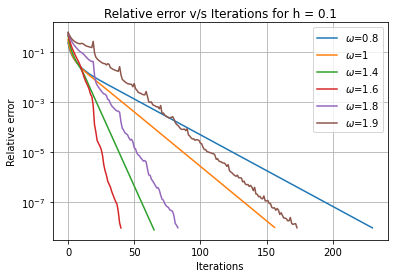

In [ ]:
h = 1/10
plt.yscale("log")
plt.plot(SOR(0.8,h)[0],SOR(0.8,h)[1],label=r'$\omega$=0.8')
plt.plot(SOR(1,h)[0],SOR(1,h)[1],label=r'$\omega$=1')
plt.plot(SOR(1.4,h)[0],SOR(1.4,h)[1],label=r'$\omega$=1.4')
plt.plot(SOR(1.6,h)[0],SOR(1.6,h)[1],label=r'$\omega$=1.6')
plt.plot(SOR(1.8,h)[0],SOR(1.8,h)[1],label=r'$\omega$=1.8')
plt.plot(SOR(1.9,h)[0],SOR(1.9,h)[1],label=r'$\omega$=1.9')
plt.title("Relative error v/s Iterations for h = {}".format(h))
plt.xlabel("Iterations")
plt.ylabel("Relative error")
plt.legend()
plt.grid()
plt.show()

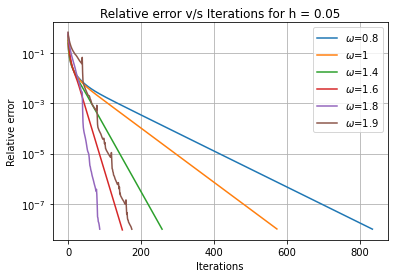

In [ ]:
h = 1/20
plt.yscale("log")
plt.plot(SOR(0.8,h)[0],SOR(0.8,h)[1],label=r'$\omega$=0.8')
plt.plot(SOR(1,h)[0],SOR(1,h)[1],label=r'$\omega$=1')
plt.plot(SOR(1.4,h)[0],SOR(1.4,h)[1],label=r'$\omega$=1.4')
plt.plot(SOR(1.6,h)[0],SOR(1.6,h)[1],label=r'$\omega$=1.6')
plt.plot(SOR(1.8,h)[0],SOR(1.8,h)[1],label=r'$\omega$=1.8')
plt.plot(SOR(1.9,h)[0],SOR(1.9,h)[1],label=r'$\omega$=1.9')
plt.title("Relative error v/s Iterations for h = {}".format(h))
plt.xlabel("Iterations")
plt.ylabel("Relative error")
plt.legend()
plt.grid()
plt.show()

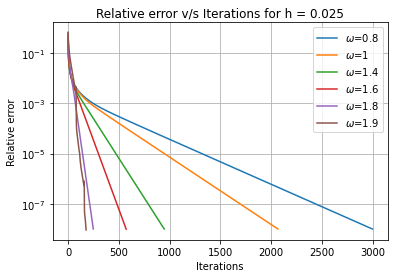

In [ ]:
h = 1/40
plt.yscale("log")
plt.plot(SOR(0.8,h)[0],SOR(0.8,h)[1],label=r'$\omega$=0.8')
plt.plot(SOR(1,h)[0],SOR(1,h)[1],label=r'$\omega$=1')
plt.plot(SOR(1.4,h)[0],SOR(1.4,h)[1],label=r'$\omega$=1.4')
plt.plot(SOR(1.6,h)[0],SOR(1.6,h)[1],label=r'$\omega$=1.6')
plt.plot(SOR(1.8,h)[0],SOR(1.8,h)[1],label=r'$\omega$=1.8')
plt.plot(SOR(1.9,h)[0],SOR(1.9,h)[1],label=r'$\omega$=1.9')
plt.title("Relative error v/s Iterations for h = {}".format(h))
plt.xlabel("Iterations")
plt.ylabel("Relative error")
plt.legend()
plt.grid()
plt.show()

In [ ]:
def Gauss_Seidel_method(h):
  N = int((1-0)/h)
  u = np.zeros((N+1,N+1))

  x=np.arange(0,1.0001,h)
  y=np.arange(0,1.0001,h)

  #Setting boundary conditions
  j = 0 
  i = 0

  while j < N:
        #setting the value of u for x=0
        u[0][j]= 0
        #setting the value of u for x=N
        u[N][j]= y[j] 
        j=j+1
  
  while i < N+1:
        #setting the value of u for y=0 
        u[i][0]= (x[i]-1)*np.sin(x[i])
        #setting the value of u for y=N 
        u[i][N]= x[i]*(2-x[i]) 
        i = i+1

  #Solving the differential equation using jacobi iterative method
  itr = 0 #counting the number of iterations
  tolerance = 1
  temp = np.empty((N+1,N+1))
  error  = []
  iterations = []

  while tolerance > (10**-8):
      #loops for Gauss_Seidel_method
      temp = np.copy(u)
      for i in range(1,N):
          for j in range(1,N):
              u[i][j] = (1/4)*(u[i-1][j]+u[i+1][j]+u[i][j+1]+u[i][j-1])
    
      #Estimating tolerance
      tolerance = np.linalg.norm(u-temp)/np.linalg.norm(u)
      iterations.append(itr)
      error.append(tolerance)
      #print("itr: ",itr,"Tolerance: ",tolerance)
      itr = itr + 1

  print("Number of iterations: ",itr)
  plt.yscale("log")
  plt.plot(iterations,error)
  plt.title("Relative error v/s Iterations for h = {}".format(h))
  plt.xlabel("Iterations")
  plt.ylabel("Relative error")
  plt.grid()
  plt.show()

  X, Y = np.meshgrid(x, y)

  fig = plt.figure(figsize=(7,6))
  ax = fig.add_subplot(projection='3d');

  ax.plot_surface(X, Y, u,cmap=cm.coolwarm);
  ax.set_xlabel('x');
  ax.set_ylabel('y');
  ax.set_zlabel('u')
  plt.title(r'3D surface plot of the solution for h = {}'.format(h));
  plt.show();


Number of iterations:  157


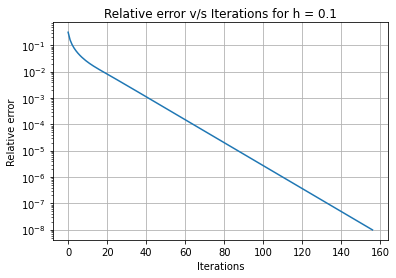

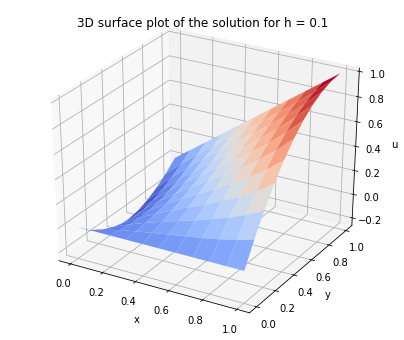

In [ ]:
Gauss_Seidel_method(1/10)

Number of iterations:  574


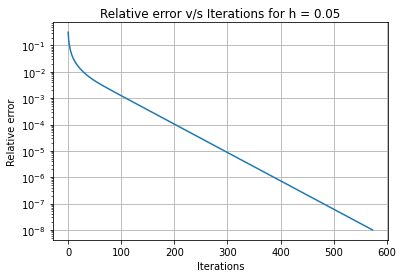

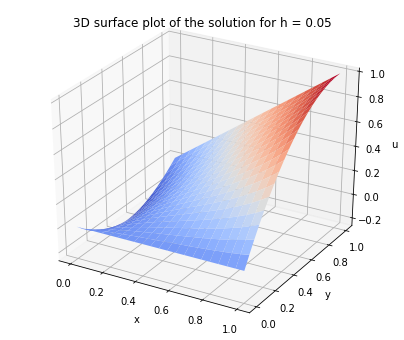

In [ ]:
Gauss_Seidel_method(1/20)

Number of iterations:  2069


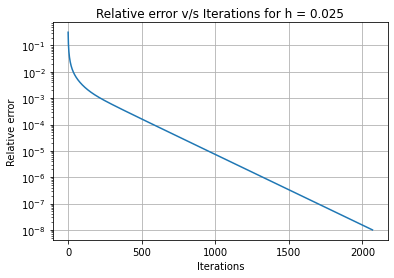

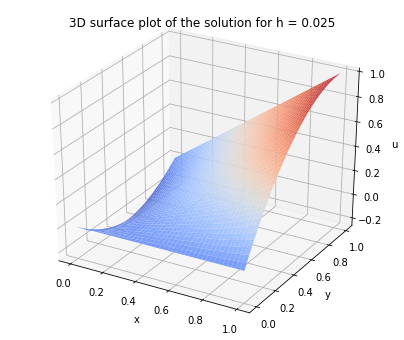

In [ ]:
Gauss_Seidel_method(1/40)